##  Import necessary libaries

In [82]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Web scrapping

In [2]:
def page_requests(url):
    urls = url
    page = requests.get(urls)
    return page

In [3]:
url_1 = page_requests(url='https://www.flipkart.com/samsung-galaxy-f12-sea-green-64-gb/product-reviews/itm4d3582cd695fd?pid=MOBGFG794YPQ9RAE&lid=LSTMOBGFG794YPQ9RAEGUPPTW&marketplace=FLIPKART&page=3')
url_2 = page_requests(url='https://www.flipkart.com/samsung-galaxy-f12-sea-green-64-gb/product-reviews/itm4d3582cd695fd?pid=MOBGFG794YPQ9RAE&lid=LSTMOBGFG794YPQ9RAEGUPPTW&marketplace=FLIPKART&page=2')
url_3 = page_requests(url = 'https://www.flipkart.com/samsung-galaxy-f12-sea-green-64-gb/product-reviews/itm4d3582cd695fd?pid=MOBGFG794YPQ9RAE&lid=LSTMOBGFG794YPQ9RAEGUPPTW&marketplace=FLIPKART&page=5')
url_4 = page_requests(url ='https://www.flipkart.com/samsung-galaxy-f12-sea-green-64-gb/product-reviews/itm4d3582cd695fd?pid=MOBGFG794YPQ9RAE&lid=LSTMOBGFG794YPQ9RAEGUPPTW&marketplace=FLIPKART&page=8')

In [4]:
def scrapping(text):
    soup = bs(text.content,'html.parser')
    reviews = soup.find_all('div',class_='t-ZTKy')
    review = []
    for item in reviews:
        item = item.get_text().replace('\n','')
        item = item.strip(' ')
        review.append(item)
    return review

In [5]:
scrap_1 = scrapping(url_1)
scrap_2 = scrapping(url_2)
scrap_3 = scrapping(url_3)
scrap_4 = scrapping(url_4)

In [6]:
reviews = scrap_1 + scrap_2 + scrap_3 + scrap_4 

In [7]:
df = pd.DataFrame(data=reviews,columns=['reviews'])
df

,reviews
0,it's not very good but battery is good process...
1,I'm writing this review after 4 days of using ...
2,Camera is not so good . Battery is not like 60...
3,It is a good quality product and it is better ...
4,Very nice product according to price. delivere...
5,Good features and camera quality is good and ...
6,This mobile f12 is absolute value for money wi...
7,The camera optimization is very poor. The 48Mp...
8,It is very very nice and it's is Battery pref...
9,This Phone is awesome in this price point it h...


## Text cleaning

In [8]:
import neattext.functions as nt

In [9]:
def cleaning(text):
    cleaned_text = text.apply(nt.remove_multiple_spaces)
    cleaned_text = text.apply(nt.remove_emojis)
    cleaned_text = text.apply(nt.remove_special_characters)
    cleaned_text = text.apply(nt.remove_userhandles)
    cleaned_text = text.apply(nt.remove_hashtags)
    cleaned_text = text.apply(nt.remove_urls)
    cleaned_text = text.apply(nt.remove_stopwords)
    cleaned_text = text.apply(nt.remove_punctuations)
    cleaned_text = text.apply(nt.remove_special_characters)
    return cleaned_text

In [10]:
text = df['reviews']

In [11]:
cleaned_review  = cleaning(text)

In [12]:
df['cleaned_reviews'] = cleaned_review

In [13]:
df['cleaned_reviews'] = df['cleaned_reviews'].apply(nt.remove_emojis)

In [14]:
df

,reviews,cleaned_reviews
0,it's not very good but battery is good process...,its not very good but battery is good processo...
1,I'm writing this review after 4 days of using ...,Im writing this review after 4 days of using t...
2,Camera is not so good . Battery is not like 60...,Camera is not so good Battery is not like 600...
3,It is a good quality product and it is better ...,It is a good quality product and it is better ...
4,Very nice product according to price. delivere...,Very nice product according to price delivered...
5,Good features and camera quality is good and ...,Good features and camera quality is good and ...
6,This mobile f12 is absolute value for money wi...,This mobile f12 is absolute value for money wi...
7,The camera optimization is very poor. The 48Mp...,The camera optimization is very poor The 48Mps...
8,It is very very nice and it's is Battery pref...,It is very very nice and its is Battery prefo...
9,This Phone is awesome in this price point it h...,This Phone is awesome in this price point it h...


In [15]:
tokens = df['cleaned_reviews'].to_list()

In [16]:
tokens = [token for line in tokens for token in line.split() ]
tokens

['its',
 'not',
 'very',
 'good',
 'but',
 'battery',
 'is',
 'good',
 'processor',
 'is',
 'not',
 'very',
 'good',
 'so',
 'if',
 'we',
 'have',
 'to',
 'do',
 'gaming',
 'then',
 'it',
 'is',
 'not',
 'better',
 'for',
 'usREAD',
 'MORE',
 'Im',
 'writing',
 'this',
 'review',
 'after',
 '4',
 'days',
 'of',
 'using',
 'this',
 'phone',
 'According',
 'to',
 'the',
 'price',
 'this',
 'phone',
 'is',
 'excellent',
 'Battery',
 'life',
 'is',
 'amazing',
 'Lasts',
 'about',
 '2',
 'days',
 'after',
 'charging',
 'Display',
 'is',
 'good',
 'Sound',
 'quality',
 'is',
 'not',
 'that',
 'great',
 'but',
 'its',
 'okay',
 'There',
 'are',
 'some',
 'amazing',
 'advance',
 'features',
 'A',
 'bit',
 'heavy',
 'though',
 'Overall',
 'this',
 'is',
 'an',
 'amazing',
 'phone',
 'in',
 'this',
 'budgetREAD',
 'MORE',
 'Camera',
 'is',
 'not',
 'so',
 'good',
 'Battery',
 'is',
 'not',
 'like',
 '6000',
 'mah',
 'Only',
 'phone',
 'look',
 'is',
 'good',
 'READ',
 'MORE',
 'It',
 'is',
 'a',

In [17]:
#lower the data
lower_words = [lower.lower() for lower in tokens]
lower_words

['its',
 'not',
 'very',
 'good',
 'but',
 'battery',
 'is',
 'good',
 'processor',
 'is',
 'not',
 'very',
 'good',
 'so',
 'if',
 'we',
 'have',
 'to',
 'do',
 'gaming',
 'then',
 'it',
 'is',
 'not',
 'better',
 'for',
 'usread',
 'more',
 'im',
 'writing',
 'this',
 'review',
 'after',
 '4',
 'days',
 'of',
 'using',
 'this',
 'phone',
 'according',
 'to',
 'the',
 'price',
 'this',
 'phone',
 'is',
 'excellent',
 'battery',
 'life',
 'is',
 'amazing',
 'lasts',
 'about',
 '2',
 'days',
 'after',
 'charging',
 'display',
 'is',
 'good',
 'sound',
 'quality',
 'is',
 'not',
 'that',
 'great',
 'but',
 'its',
 'okay',
 'there',
 'are',
 'some',
 'amazing',
 'advance',
 'features',
 'a',
 'bit',
 'heavy',
 'though',
 'overall',
 'this',
 'is',
 'an',
 'amazing',
 'phone',
 'in',
 'this',
 'budgetread',
 'more',
 'camera',
 'is',
 'not',
 'so',
 'good',
 'battery',
 'is',
 'not',
 'like',
 '6000',
 'mah',
 'only',
 'phone',
 'look',
 'is',
 'good',
 'read',
 'more',
 'it',
 'is',
 'a',

In [28]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['it', 'not', 'veri', 'good', 'but', 'batteri', 'is', 'good', 'processor', 'is', 'not', 'veri', 'good', 'so', 'if', 'we', 'have', 'to', 'do', 'game', 'then', 'it', 'is', 'not', 'better', 'for', 'usread', 'more', 'im', 'write', 'thi', 'review', 'after', '4', 'day', 'of', 'use', 'thi', 'phone', 'accord', 'to', 'the', 'price', 'thi', 'phone', 'is', 'excel', 'batteri', 'life', 'is', 'amaz', 'last', 'about', '2', 'day', 'after', 'charg', 'display', 'is', 'good', 'sound', 'qualiti', 'is', 'not', 'that', 'great', 'but', 'it', 'okay', 'there', 'are', 'some', 'amaz', 'advanc', 'featur', 'a', 'bit', 'heavi', 'though', 'overal', 'thi', 'is', 'an', 'amaz', 'phone', 'in', 'thi', 'budgetread', 'more', 'camera', 'is', 'not', 'so', 'good', 'batteri', 'is', 'not', 'like', '6000', 'mah', 'onli', 'phone', 'look', 'is', 'good', 'read', 'more', 'it', 'is', 'a', 'good', 'qualiti', 'product', 'and', 'it', 'is', 'better', 'then', 'my', 'expect', 'it', 'a', 'cool', 'phone', 'as', 'it', 'a', 'med', 'rang', 'pho

In [32]:
cleaned_reviews=' '.join(stemmed_tokens)
cleaned_reviews

'it not veri good but batteri is good processor is not veri good so if we have to do game then it is not better for usread more im write thi review after 4 day of use thi phone accord to the price thi phone is excel batteri life is amaz last about 2 day after charg display is good sound qualiti is not that great but it okay there are some amaz advanc featur a bit heavi though overal thi is an amaz phone in thi budgetread more camera is not so good batteri is not like 6000 mah onli phone look is good read more it is a good qualiti product and it is better then my expect it a cool phone as it a med rang phoneread more veri nice product accord to price deliv next day after book camera batteri display good everi one may buy with out ani doubt i recommend it to samsung lover love mobileread more good featur and camera qualiti is good and power batteri and nice and auto call record option is also avail if dont want auto call record option manual call record option is also avail but the probl

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
reviews_cv = cv.fit_transform(stemmed_tokens)

In [35]:
print(cv.vocabulary_)

{'it': 262, 'not': 342, 'veri': 537, 'good': 220, 'but': 97, 'batteri': 70, 'is': 258, 'processor': 398, 'so': 472, 'if': 250, 'we': 547, 'have': 238, 'to': 516, 'do': 162, 'game': 210, 'then': 503, 'better': 79, 'for': 203, 'usread': 534, 'more': 320, 'im': 251, 'write': 570, 'thi': 505, 'review': 437, 'after': 26, 'day': 142, 'of': 345, 'use': 530, 'phone': 374, 'accord': 22, 'the': 501, 'price': 393, 'excel': 181, 'life': 275, 'amaz': 35, 'last': 271, 'about': 20, 'charg': 108, 'display': 159, 'sound': 476, 'qualiti': 408, 'that': 500, 'great': 230, 'okay': 350, 'there': 504, 'are': 49, 'some': 473, 'advanc': 25, 'featur': 192, 'bit': 82, 'heavi': 241, 'though': 511, 'overal': 367, 'an': 39, 'in': 255, 'budgetread': 94, 'camera': 101, 'like': 277, '6000': 14, 'mah': 288, 'onli': 356, 'look': 282, 'read': 420, 'product': 399, 'and': 40, 'my': 328, 'expect': 182, 'cool': 134, 'as': 51, 'med': 297, 'rang': 412, 'phoneread': 376, 'nice': 337, 'deliv': 150, 'next': 336, 'book': 86, 'ever

In [37]:
print(cv.get_feature_names()[150:300])

['deliv', 'deliveri', 'deliveryread', 'design', 'devic', 'didnt', 'differencecamera', 'disabl', 'disappoint', 'display', 'displaycamera', 'displayread', 'do', 'doesnot', 'doesnt', 'dolbi', 'dont', 'doubt', 'down', 'dslr', 'due', 'dullther', 'dure', 'effici', 'enabl', 'enjoy', 'especi', 'even', 'everi', 'everyth', 'exactli', 'excel', 'expect', 'experi', 'experiencepleas', 'explicitli', 'f12', 'f12i', 'fantast', 'far', 'fast', 'faster', 'featur', 'featuresit', 'feel', 'fell', 'fhd', 'fi', 'filpkart', 'fine', 'firstimesamsung', 'flipkart', 'flipkartread', 'for', 'friendli', 'from', 'front', 'full', 'fullcharg', 'fulli', 'game', 'gamer', 'gb', 'gen', 'genral', 'get', 'give', 'givenread', 'glass', 'go', 'good', 'goodand', 'goodbatteri', 'goodconsselfi', 'gooddisplay', 'goodno', 'goodphon', 'gorilla', 'got', 'graet', 'great', 'green', 'guard', 'ha', 'handl', 'hang', 'happen', 'happi', 'have', 'hd', 'heat', 'heavi', 'here', 'hi', 'high', 'highli', 'hit', 'home', 'hour', 'huge', 'if', 'im', 'i

In [38]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
print(reviewscv.toarray().shape)

(2073, 577)


In [41]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(stemmed_tokens)

In [42]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['48mp', '6000mah', 'about', 'after', 'all', 'also', 'amaz', 'and', 'ani', 'are', 'as', 'awesom', 'back', 'backup', 'bad', 'batteri', 'be', 'best', 'better', 'bit', 'bright', 'budget', 'but', 'buy', 'call', 'camera', 'can', 'could', 'day', 'display', 'dont', 'even', 'featur', 'for', 'from', 'front', 'game', 'good', 'great', 'ha', 'have', 'heavi', 'if', 'im', 'in', 'is', 'it', 'just', 'last', 'like', 'littl', 'look', 'love', 'mobil', 'money', 'more', 'much', 'nice', 'no', 'not', 'of', 'on', 'one', 'option', 'or', 'other', 'out', 'overal', 'perform', 'phone', 'price', 'problem', 'product', 'qualiti', 'rang', 'read', 'realli', 'recommend', 'samsung', 'so', 'take', 'than', 'that', 'the', 'then', 'there', 'thi', 'to', 'up', 'upto', 'use', 'user', 'valu', 'veri', 'wa', 'we', 'will', 'with', 'work', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [45]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['13', '13mp', '15day', '24', '2day', '2hour', '2mp', '30', '30a', '3day', '45read', '48mp', '48mpit', '50', '6000', '6000mah', '62', '8mp', '90', '90hz', 'about', 'absolut', 'accord', 'ad', 'adapt', 'advanc', 'after', 'all', 'along', 'also', 'alsospeak', 'although', 'alwaysread', 'alwaysthank', 'am', 'amaz', 'amazing3', 'amol', 'among', 'an', 'and', 'angl', 'ani', 'anoth', 'anyon', 'apart', 'app', 'appear', 'ardent', 'are', 'are1', 'as', 'at', 'atleast', 'atmo', 'attend', 'attract', 'audio', 'auto', 'avail', 'avarag', 'averag', 'awesom', 'awsom', 'back', 'backcamera', 'background', 'backup', 'bad', 'base', 'batteri', 'batteryback', 'be', 'becaus', 'becom', 'becoz', 'been', 'best', 'bestand', 'better', 'betterbatteri', 'big', 'bit', 'black', 'blend', 'bloatwar', 'book', 'bought', 'boy', 'brand', 'brandif', 'bright', 'brighter', 'budget', 'budgetread', 'build', 'bulki', 'but', 'buy', 'call', 'cam', 'camera', 'cameraread', 'can', 'cannot', 'cant', 'captur', 'case', 'charg', 'chargei', 'c

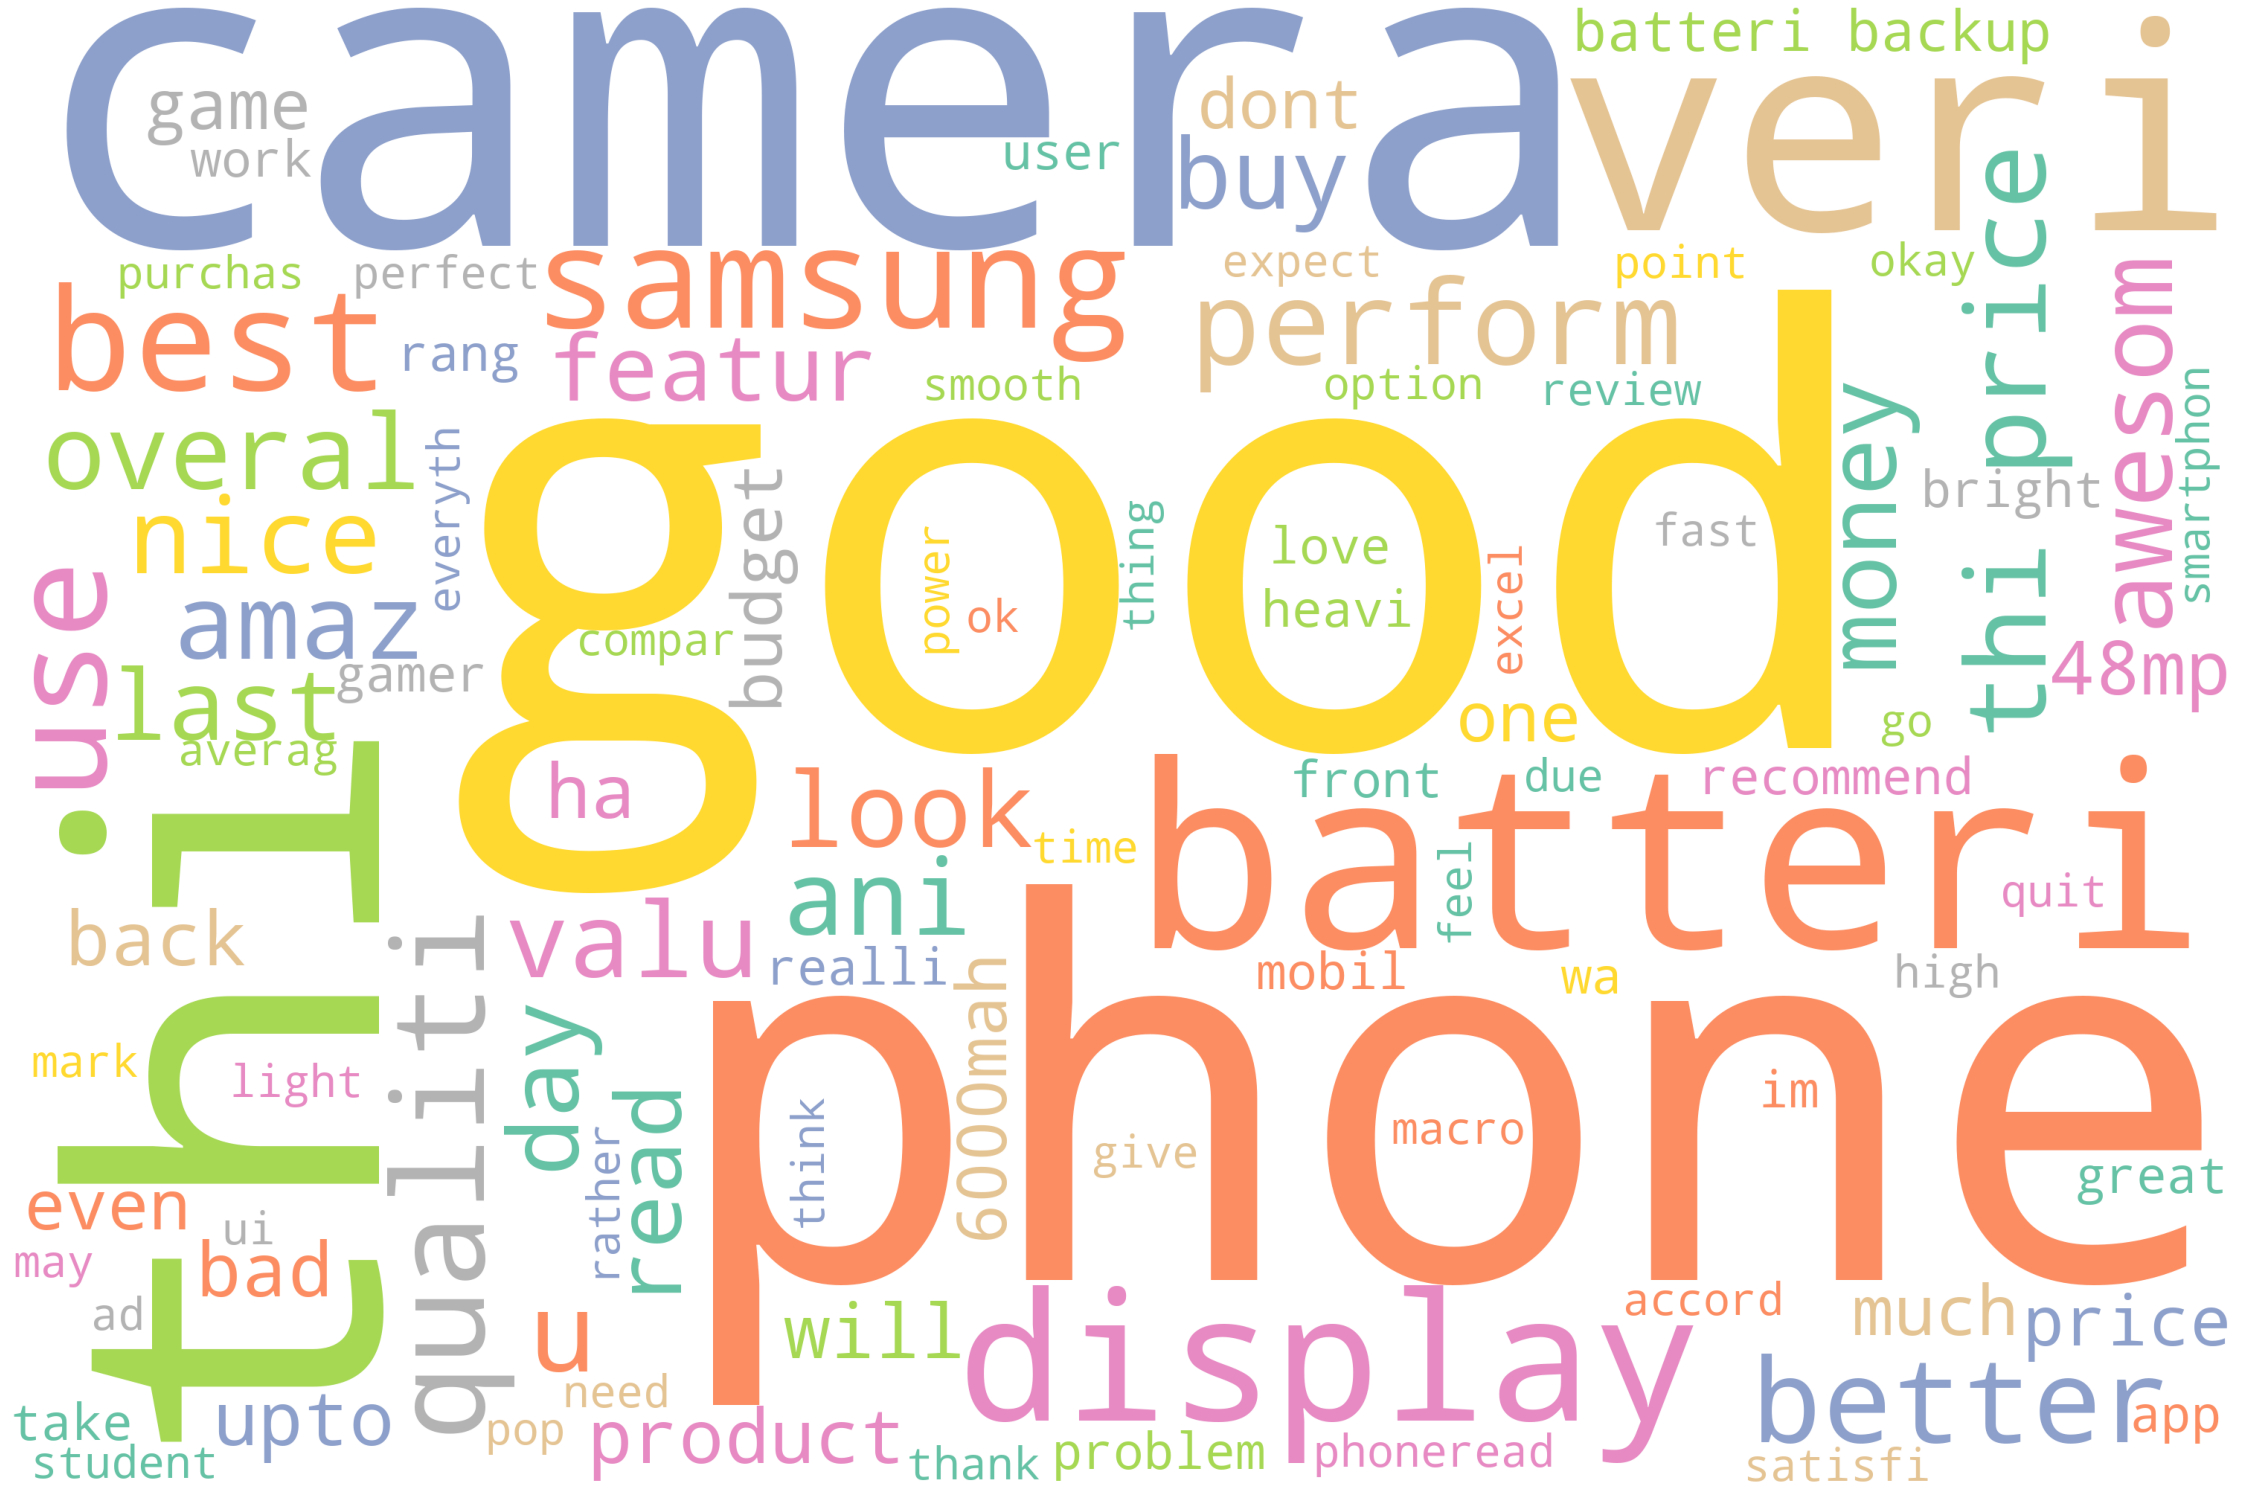

In [49]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(cleaned_reviews)
plot_cloud(wordcloud)

In [57]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=cleaned_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [58]:
for token in doc_block[100:200]:
    print(token,token.pos_)

mah NOUN
onli NOUN
phone NOUN
look NOUN
is AUX
good ADJ
read NOUN
more ADJ
it PRON
is AUX
a DET
good ADJ
qualiti PROPN
product NOUN
and CCONJ
it PRON
is AUX
better ADJ
then ADV
my PRON
expect VERB
it PRON
a DET
cool ADJ
phone NOUN
as SCONJ
it PRON
a DET
med ADJ
rang NOUN
phoneread NOUN
more ADV
veri ADJ
nice ADJ
product NOUN
accord NOUN
to PART
price VERB
deliv NOUN
next ADJ
day NOUN
after ADP
book NOUN
camera NOUN
batteri PROPN
display NOUN
good PROPN
everi PROPN
one NUM
may AUX
buy VERB
with ADP
out ADP
ani NOUN
doubt NOUN
i PRON
recommend VERB
it PRON
to ADP
samsung PROPN
lover PROPN
love PROPN
mobileread VERB
more ADV
good ADJ
featur NOUN
and CCONJ
camera NOUN
qualiti NOUN
is AUX
good ADJ
and CCONJ
power NOUN
batteri NOUN
and CCONJ
nice ADJ
and CCONJ
auto NOUN
call NOUN
record NOUN
option NOUN
is AUX
also ADV
avail NOUN
if SCONJ
do AUX
nt PART
want VERB
auto NOUN
call NOUN
record NOUN
option NOUN
manual ADJ
call NOUN
record NOUN
option NOUN
is AUX
also ADV
avail NOUN
but CCONJ


In [60]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['photo', 'look', 'captur', 'camera', 'shot', 'compar', 'ani', 'chines', 'phone', 'are', 'ad', 'ui', 'feel', 'use', 'batteri', 'plu', 'point', 'thi', 'phone', 'person', 'ui', 'compar', 'miui', 'bloatwar', 'ad', 'pop', 'middl', 'work', 'case', 'miuiread', 'batteri', 'preform', 'awesom', '3day', 'perform', 'chip', 'super', 'camera', 'read', 'thi', 'phone', 'price', 'point', 'graet', 'featur', 'phone', 'display', 'hd', 'fell', 'fhd', 'colur', 'contrast', 'goodand', 'boy', 'cooperativeread', 'phone', 'look', 'appear', 'tint', 'glass', 'pop', 'look', 'see', 'give', 'compliment', 'display', 'precis', 'color', 'sea', 'touch', 'scroll', 'sideway', 'batteri', 'hour', 'use', 'connect', 'work', 'nicelynow', 'con', 'are', 'color', 'displayread', 'person', 'feel', 'design', 'phone', 'veri', 'impress', 'camera', 'qualiti', 'price', 'pointperform', 'life', 'support', 'charg', 'feel', 'display', 'display', 'disappoint', 'buy']


In [61]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,44
1,camera,33
2,display,21
3,batteri,19
4,use,13
5,veri,12
6,price,11
7,perform,10
8,valu,8
9,day,7


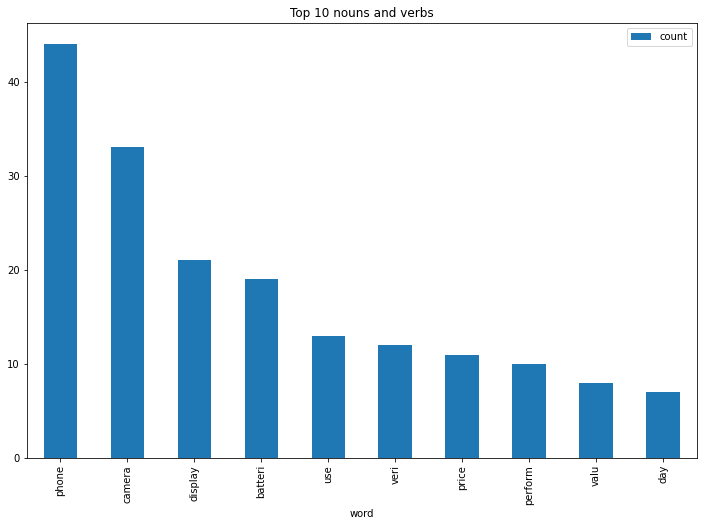

In [62]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [65]:
from afinn import Afinn
afinn = Afinn(language='en')

In [66]:
afinn.score('excellent')

3.0

In [69]:
df['sentiment_value'] = df['cleaned_reviews'].apply(afinn.score)

In [70]:
df

,reviews,cleaned_reviews,sentiment_value
0,it's not very good but battery is good process...,its not very good but battery is good processo...,11.0
1,I'm writing this review after 4 days of using ...,Im writing this review after 4 days of using t...,23.0
2,Camera is not so good . Battery is not like 60...,Camera is not so good Battery is not like 600...,8.0
3,It is a good quality product and it is better ...,It is a good quality product and it is better ...,8.0
4,Very nice product according to price. delivere...,Very nice product according to price delivered...,10.0
5,Good features and camera quality is good and ...,Good features and camera quality is good and ...,15.0
6,This mobile f12 is absolute value for money wi...,This mobile f12 is absolute value for money wi...,6.0
7,The camera optimization is very poor. The 48Mp...,The camera optimization is very poor The 48Mps...,2.0
8,It is very very nice and it's is Battery pref...,It is very very nice and its is Battery prefo...,13.0
9,This Phone is awesome in this price point it h...,This Phone is awesome in this price point it h...,8.0


In [72]:
df['word_count']=df['cleaned_reviews'].str.split().apply(len)
df['word_count']

0     28
1     61
2     18
3     24
4     32
5     58
6     67
7     89
8     31
9     42
10    86
11    71
12    85
13    76
14    47
15    33
16    32
17    77
18    46
19    56
20    22
21    27
22    29
23    84
24    56
25    83
26    47
27    26
28    75
29    99
30    17
31    65
32    60
33    46
34    64
35    10
36    60
37    78
38    33
39    33
Name: word_count, dtype: int64

In [73]:
df.sort_values(by='sentiment_value')

,reviews,cleaned_reviews,sentiment_value,word_count
33,Phone is very good but there is no screen guar...,Phone is very good but there is no screen guar...,-1.0,46
28,Display is waste even less budget phones of ot...,Display is waste even less budget phones of ot...,2.0,75
7,The camera optimization is very poor. The 48Mp...,The camera optimization is very poor The 48Mps...,2.0,89
26,"When I was ordered it is M12 , but I received ...",When I was ordered it is M12 but I received F...,3.0,47
10,The phone looks great in appearance. Fully bla...,The phone looks great in appearance Fully blac...,4.0,86
37,1. camera not clear like 48mp (May be it will...,1 camera not clear like 48mp May be it will b...,5.0,78
6,This mobile f12 is absolute value for money wi...,This mobile f12 is absolute value for money wi...,6.0,67
38,As per this rate its good deal for me.I like i...,As per this rate its good deal for meI like it...,7.0,33
16,"Low light camera is not good , selfie is avera...",Low light camera is not good selfie is averag...,7.0,32
24,You use it as a secondary phone not primary An...,You use it as a secondary phone not primary An...,7.0,56


In [74]:
df[df.sentiment_value <= 0]

,reviews,cleaned_reviews,sentiment_value,word_count
33,Phone is very good but there is no screen guar...,Phone is very good but there is no screen guar...,-1.0,46


In [75]:
df[df.sentiment_value > 0]

,reviews,cleaned_reviews,sentiment_value,word_count
0,it's not very good but battery is good process...,its not very good but battery is good processo...,11.0,28
1,I'm writing this review after 4 days of using ...,Im writing this review after 4 days of using t...,23.0,61
2,Camera is not so good . Battery is not like 60...,Camera is not so good Battery is not like 600...,8.0,18
3,It is a good quality product and it is better ...,It is a good quality product and it is better ...,8.0,24
4,Very nice product according to price. delivere...,Very nice product according to price delivered...,10.0,32
5,Good features and camera quality is good and ...,Good features and camera quality is good and ...,15.0,58
6,This mobile f12 is absolute value for money wi...,This mobile f12 is absolute value for money wi...,6.0,67
7,The camera optimization is very poor. The 48Mp...,The camera optimization is very poor The 48Mps...,2.0,89
8,It is very very nice and it's is Battery pref...,It is very very nice and its is Battery prefo...,13.0,31
9,This Phone is awesome in this price point it h...,This Phone is awesome in this price point it h...,8.0,42


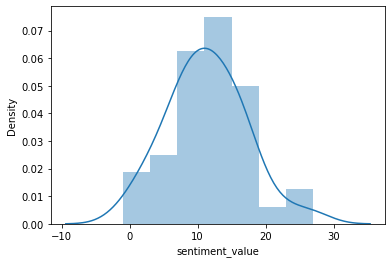

In [83]:
sns.distplot(df['sentiment_value'])
plt.show()

In [77]:
df['index']=range(0,len(df))

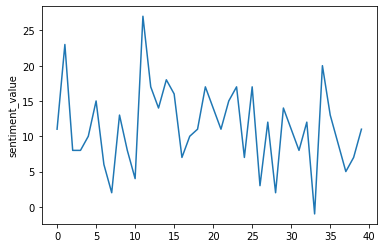

In [84]:
sns.lineplot(y = df.sentiment_value, x = df.index)
plt.show()

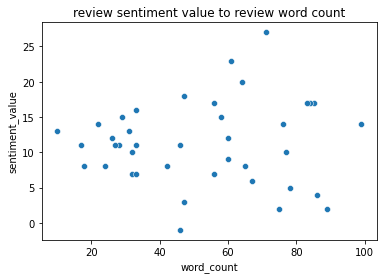

In [85]:
sns.scatterplot(df.word_count, df.sentiment_value)
plt.title('review sentiment value to review word count')
plt.show()

## =============================== End ===================================